In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from estimator.models.arxiv_depth_anythingv2.depth_anything_v2.dpt import DepthAnythingV2 as original_model


original_model = original_model.build( encoder_type='vits')

/opt/conda/envs/patchfusion/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/envs/patchfusion/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/dongjae.lee/ftp_shared_internal/Projects/SEC_VD/1.Code/PatchFusion/estimator/models/depth_anything_v2/dinov2_layers/attention.py:28: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")


In [3]:
19*4*14

1064

In [4]:
34*4*14

1904

In [5]:
from estimator.models.depth_anything_v2.dpt import DepthAnythingV2


model = DepthAnythingV2.build(img_size=(1064, 1904), num_slice=(2, 2), num_prompt_tokens=0, encoder_type='vits_prompt')

In [6]:
import torch

ckpt = torch.load('/home/dongjae.lee/ftp_shared_internal/Projects/SEC_VD/1.Code/PatchFusion/pretrained_ckpt/depth_anything_v2_vits.pth')

model.load_state_dict(ckpt, strict=False)

model.cuda()
model.eval()

print()

In [7]:
import torch

ckpt = torch.load('/home/dongjae.lee/ftp_shared_internal/Projects/SEC_VD/1.Code/PatchFusion/pretrained_ckpt/depth_anything_v2_vits.pth')

original_model.load_state_dict(ckpt)

original_model.cuda()
original_model.eval()

print()

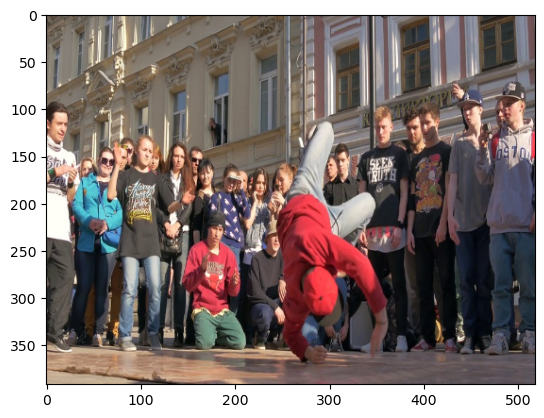

In [8]:
import argparse
import cv2
import numpy as np
import os
import torch
import torch.nn.functional as F
from torchvision.transforms import Compose
from matplotlib import pyplot as plt

filename = '/home/dongjae.lee/ftp_shared_internal/Projects/SEC_VD/2.Dataset/DAVIS/JPEGImages/480p/breakdance/00040.jpg'


raw_frame = cv2.imread(filename)
raw_frame = cv2.cvtColor(raw_frame, cv2.COLOR_BGR2RGB)
raw_frame = cv2.resize(raw_frame, (518, 392))

plt.imshow(raw_frame)


In [9]:
from estimator.datasets.transformers.depth_anything import NormalizeImage, PrepareForNet, Resize

w = 1904
h = 1064

transform = Compose([
    Resize(
        width=w,
        height=h,
        resize_target=False,
        keep_aspect_ratio=False,
        ensure_multiple_of=14,
        resize_method='lower_bound',
        image_interpolation_method=cv2.INTER_CUBIC,
    ),
    NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    PrepareForNet(),
])

In [10]:
img_tensor = transform({'image': raw_frame})['image']
img_tensor = torch.from_numpy(img_tensor).unsqueeze(0).float()
img_tensor.shape

torch.Size([1, 3, 1064, 1904])

In [11]:
34*4*14

1904

In [12]:
out = model(img_tensor.cuda())

print(out.shape)

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


torch.Size([1, 1, 1064, 1904])


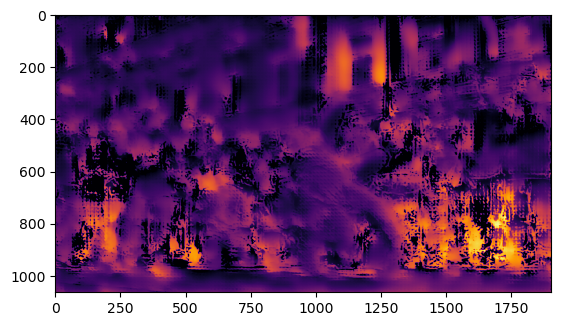

In [13]:
plt.imshow(out.detach().cpu().numpy()[0,0], cmap='inferno')

In [14]:
out = original_model.infer_image(raw_frame, input_size=(504))

print(out.shape)

(392, 518)


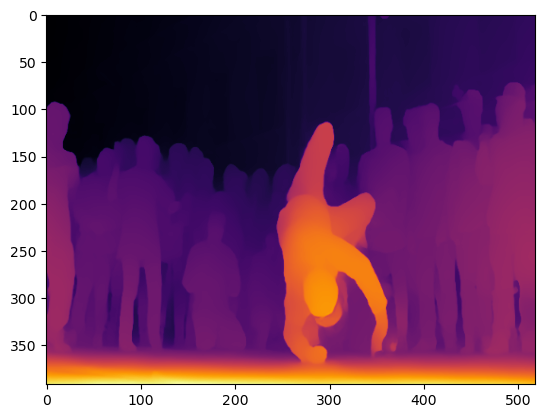

In [15]:
plt.imshow(out, cmap='inferno')